測試檔案大小每個 64MB 10次實驗 每次分別上傳 1~10個檔案 算時間

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

testList = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

def plotMeanLine(df):
    fig = plt.figure()
    plt.xlabel('files (64MB per file)')
    plt.ylabel('time (sec)')
    plt.plot(testList, df.describe().iloc[1], 'ro')
    plt.plot(testList, df.describe().iloc[1], 'r--')

def plotTop25Line(df):
    fig = plt.figure()
    plt.xlabel('files (64MB per file)')
    plt.ylabel('time (sec)')
    plt.plot(testList, df.describe().iloc[4], 'ro')
    plt.plot(testList, df.describe().iloc[4], 'r--')

每個64MB檔案 逐一上傳 無儲存後端

In [3]:
dfSmallFile = pd.read_csv('minio/small_file_upload.csv')
dfSmallFile

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,1.203474,2.534767,3.604909,4.853459,6.279754,11.000842,12.964826,12.918616,14.224927,18.171904
1,1.218454,2.442559,3.691871,6.094504,6.936293,9.888899,11.179858,12.393044,15.187487,12.633184
2,1.220865,2.550694,4.565332,9.907707,6.987871,9.907230,15.140969,13.025887,14.968935,13.454606
3,1.219174,2.440231,4.132675,5.831806,6.788095,9.698550,12.232765,15.497384,13.077813,14.988464
4,1.211198,3.112357,5.015591,8.929742,6.827025,9.025854,13.969041,9.722535,11.077074,12.628283
5,4.155491,2.498924,4.346508,9.564861,6.402325,9.746997,10.419870,11.762854,13.250550,17.530478
6,1.382233,2.472885,5.045232,5.032496,7.917044,8.591088,9.693434,13.415126,14.513778,14.132247
7,1.261643,2.401161,4.356750,10.282180,8.067996,9.490268,9.672819,12.711914,10.924113,12.474065
8,1.195184,2.687454,5.988390,8.776811,7.018639,9.123118,11.861757,13.123613,18.725269,14.879058
9,1.223526,2.526942,4.467098,9.821027,8.833722,9.792260,9.236260,13.737756,14.507583,12.872488


In [4]:
dfSmallFile.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.529124,2.566797,4.521436,7.909460,7.205876,9.626511,11.637160,12.830873,14.045753,14.376478
std,0.924396,0.207467,0.700194,2.186760,0.807989,0.648800,1.971299,1.468702,2.227232,2.051179
min,1.195184,2.401161,3.604909,4.853459,6.279754,8.591088,9.236260,9.722535,10.924113,12.474065
25%,1.213012,2.450140,4.186133,5.897481,6.797828,9.214906,9.875043,12.472762,13.120997,12.693010
50%,1.220019,2.512933,4.411924,8.853277,6.962082,9.722773,11.520807,12.972252,14.366255,13.793427
75%,1.252114,2.546712,4.903026,9.756986,7.692443,9.864739,12.781810,13.342247,14.855146,14.961112
max,4.155491,3.112357,5.988390,10.282180,8.833722,11.000842,15.140969,15.497384,18.725269,18.171904


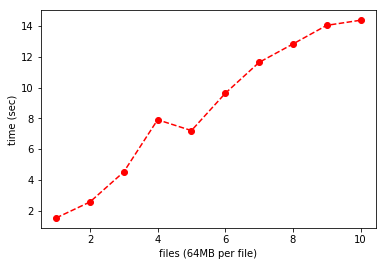

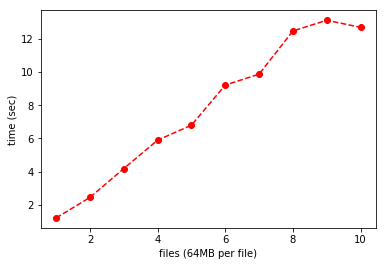

In [5]:
plotMeanLine(dfSmallFile)
plotTop25Line(dfSmallFile)

每組檔案打包成tar直接上傳 無儲存後端

In [7]:
dfBigFile = pd.read_csv('minio/big_file_upload.csv')
dfBigFile

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,1.329562,2.327422,3.474915,4.578424,5.810531,9.835681,7.762435,9.635835,9.976274,11.386045
1,1.757427,2.499994,3.555242,5.772877,6.390345,6.681292,7.687958,8.889306,13.356959,12.016915
2,1.224598,2.312004,5.125419,4.549993,5.627481,6.652333,7.810290,8.870606,12.663670,11.567707
3,1.215845,2.272234,3.483180,9.088186,5.929847,6.719345,8.354406,11.918224,13.273803,13.273385
4,1.261008,2.351741,3.693314,4.527256,5.719597,18.929998,7.853878,25.817957,10.023540,11.283223
5,1.509847,2.273455,3.431046,4.765707,6.342220,6.772183,8.733149,9.861299,10.378334,14.428340
6,1.242829,2.297993,9.193346,4.489326,6.699387,6.829297,8.188787,9.721676,12.538287,12.516342
7,1.175602,3.685575,3.420645,4.441579,5.678459,7.235673,8.342965,21.634984,10.005963,13.628456
8,1.198457,2.298655,3.525517,4.507085,5.669642,6.676154,7.705870,9.039002,11.812965,11.994147
9,1.223728,2.301761,3.455790,4.545005,5.636239,7.465100,9.179239,8.884219,13.250618,12.054671


In [8]:
dfBigFile.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.313890,2.462083,4.235841,5.126544,5.950375,8.379706,8.161898,12.427311,11.728041,12.414923
std,0.182993,0.434890,1.816485,1.446516,0.385438,3.831000,0.499170,6.103267,1.478038,1.043291
min,1.175602,2.272234,3.420645,4.441579,5.627481,6.652333,7.687958,8.870606,9.976274,11.283223
25%,1.217816,2.298158,3.460571,4.512128,5.671846,6.690805,7.774399,8.926730,10.112239,11.674317
50%,1.233714,2.306883,3.504349,4.547499,5.765064,6.800740,8.021332,9.678755,12.175626,12.035793
75%,1.312424,2.345661,3.658796,4.718887,6.239127,7.407743,8.351545,11.403993,13.103881,13.084124
max,1.757427,3.685575,9.193346,9.088186,6.699387,18.929998,9.179239,25.817957,13.356959,14.428340


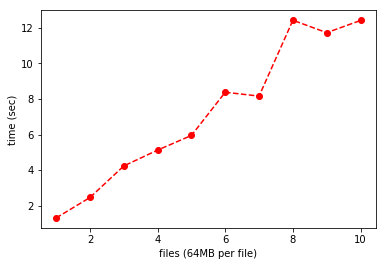

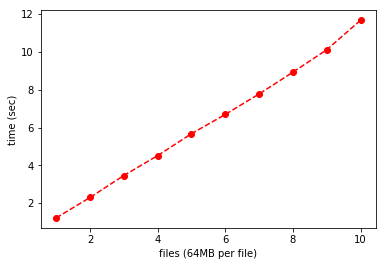

In [9]:
plotMeanLine(dfBigFile)
plotTop25Line(dfBigFile)

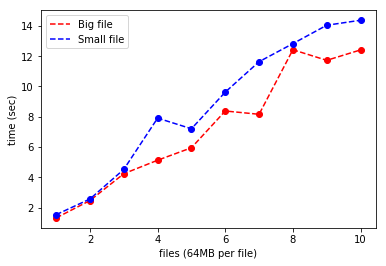

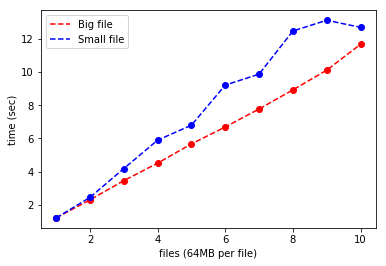

In [11]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFile.describe().iloc[1]), 'ro')
plt.plot(testList, dfBigFile.describe().iloc[1], 'r--', label='Big file')
plt.plot(testList, list(dfSmallFile.describe().iloc[1]), 'bo')
plt.plot(testList, dfSmallFile.describe().iloc[1], 'b--', label='Small file')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFile.describe().iloc[4]), 'ro')
plt.plot(testList, dfBigFile.describe().iloc[4], 'r--', label='Big file')
plt.plot(testList, list(dfSmallFile.describe().iloc[4]), 'bo')
plt.plot(testList, dfSmallFile.describe().iloc[4], 'b--', label='Small file')
plt.legend(loc='upper left')

每個64MB檔案 逐一上傳 Longhorn

In [9]:
dfSmallFileLonghorn = pd.read_csv('resultSmallFileLonghorn.csv')
dfSmallFileLonghorn

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,0.662904,9.975862,1.979610,3.159178,3.541974,6.149829,68.998281,93.915074,6.627079,70.870325
1,100.781598,1.307935,2.211611,3.714423,3.655913,4.317076,192.944644,5.223233,6.425130,197.913232
2,0.774700,1.283130,2.013537,3.705752,3.729944,206.571605,5.579463,6.227637,181.261071,7.449810
3,0.770631,1.337337,2.664069,34.051704,128.436169,4.305038,5.450019,8.523153,183.836850,7.402615
4,137.125154,1.658912,2.272817,2.969794,4.225247,38.693455,108.841498,6.066153,6.697669,148.145207
5,1.113342,1.257240,1.983611,2.749937,3.740019,210.969464,4.867433,6.155560,53.246335,116.391393
6,0.631431,1.405249,2.211043,2.828814,147.039968,4.180975,5.275445,10.282409,94.235480,6.966543
7,0.874229,1.465511,20.397114,119.265070,3.502187,4.750898,22.522059,107.347161,6.663525,142.193400
8,0.688842,1.427548,2.246645,3.117704,69.564557,102.246079,5.497076,6.086933,193.925276,8.382010
9,0.714859,1.459804,2.540858,166.554605,4.073687,3.947906,4.793630,228.380821,7.139267,7.573291


In [10]:
dfSmallFileLonghorn.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,24.413769,2.257853,4.052092,34.211698,37.150966,58.613233,42.476955,47.820813,74.005768,71.328783
std,50.557930,2.714333,5.747482,59.152649,57.013069,84.922779,63.652484,74.527496,82.617571,74.022267
min,0.631431,1.257240,1.979610,2.749937,3.502187,3.947906,4.793630,5.223233,6.425130,6.966543
25%,0.695346,1.315285,2.062914,3.006772,3.674420,4.308047,5.319088,6.104089,6.672061,7.480680
50%,0.772666,1.416399,2.229128,3.432465,3.906853,5.450364,5.538270,7.375395,30.192801,39.626167
75%,1.053564,1.464084,2.473848,26.467384,53.229730,86.357923,57.379226,73.006907,159.504673,135.742898
max,137.125154,9.975862,20.397114,166.554605,147.039968,210.969464,192.944644,228.380821,193.925276,197.913232


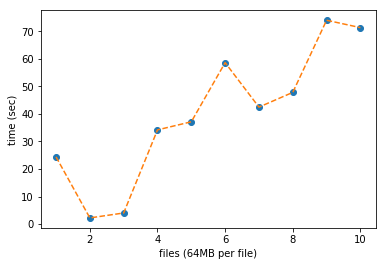

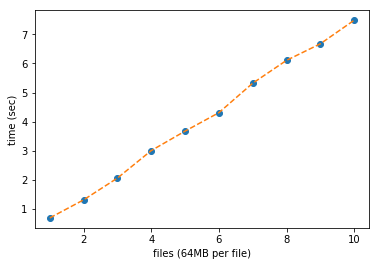

In [11]:
plotMeanLine(dfSmallFileLonghorn)
plotTop25Line(dfSmallFileLonghorn)

每組檔案打包成tar直接上傳 Longhorn

In [12]:
dfBigFileLonghorn = pd.read_csv('resultBigFileLonghorn.csv')
dfBigFileLonghorn

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,0.830501,1.457849,1.977934,2.514634,3.023250,3.600034,103.341667,4.878323,5.327220,86.450205
1,0.708103,1.353119,1.820843,2.391442,3.030798,3.586709,4.496773,4.715634,5.593925,5.946340
2,0.748563,1.340106,2.190282,2.409989,3.057714,3.679493,4.270734,4.850671,5.480045,6.124240
3,0.622917,1.239204,1.875685,86.436920,3.156448,3.603038,4.115977,43.983082,5.450186,56.638263
4,0.965626,1.595165,1.957721,2.615490,3.220711,39.816208,4.854414,5.038129,107.961730,5.954326
5,0.643505,1.365027,1.844362,2.528209,3.408031,3.641674,4.263556,4.919055,90.934078,5.971770
6,0.637555,1.267170,1.834172,4.623978,3.242862,3.574574,4.320061,25.191743,5.458944,6.061843
7,1.017354,1.426065,63.607641,2.454534,3.352658,3.752778,72.898789,4.852620,42.667085,6.050618
8,0.919404,1.457661,1.882363,2.604268,65.607167,3.592961,4.264441,4.850825,5.523916,5.904202
9,0.663028,1.235571,18.080135,2.531591,2.984807,3.570298,4.212811,4.780580,5.440361,96.344536


In [13]:
dfBigFileLonghorn.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.775655,1.373694,9.707114,11.111106,9.408445,7.241777,21.103922,10.806066,27.983749,28.144634
std,0.147583,0.113561,19.607900,26.475260,19.746740,11.445628,36.042751,13.293696,39.614304,36.960629
min,0.622917,1.235571,1.820843,2.391442,2.984807,3.570298,4.115977,4.715634,5.327220,5.904202
25%,0.648386,1.285404,1.852192,2.469559,3.037527,3.588272,4.263777,4.850710,5.452375,5.958687
50%,0.728333,1.359073,1.920042,2.529900,3.188579,3.601536,4.295398,4.865471,5.501981,6.056230
75%,0.897178,1.449762,2.137195,2.612685,3.325209,3.670039,4.765004,5.008361,33.398795,44.009757
max,1.017354,1.595165,63.607641,86.436920,65.607167,39.816208,103.341667,43.983082,107.961730,96.344536


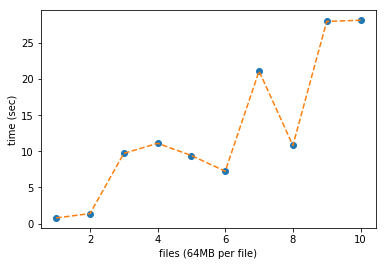

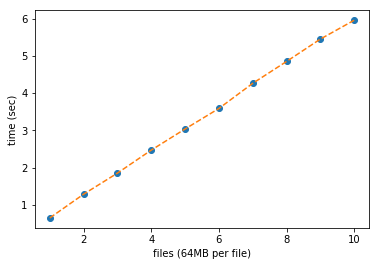

In [14]:
plotMeanLine(dfBigFileLonghorn)
plotTop25Line(dfBigFileLonghorn)

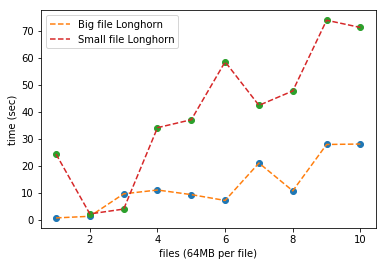

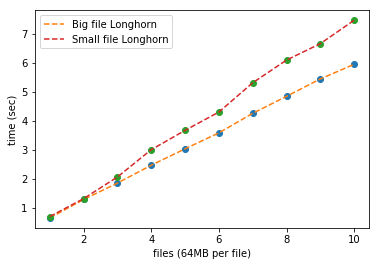

In [15]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileLonghorn.describe().iloc[1]), 'o')
plt.plot(testList, dfBigFileLonghorn.describe().iloc[1], '--', label='Big file Longhorn')
plt.plot(testList, list(dfSmallFileLonghorn.describe().iloc[1]), 'o')
plt.plot(testList, dfSmallFileLonghorn.describe().iloc[1], '--', label='Small file Longhorn')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileLonghorn.describe().iloc[4]), 'o')
plt.plot(testList, dfBigFileLonghorn.describe().iloc[4], '--', label='Big file Longhorn')
plt.plot(testList, list(dfSmallFileLonghorn.describe().iloc[4]), 'o')
plt.plot(testList, dfSmallFileLonghorn.describe().iloc[4], '--', label='Small file Longhorn')
plt.legend(loc='upper left')

每個64MB檔案 逐一上傳 NFS-Provider

In [16]:
dfSmallFileNfs = pd.read_csv('resultSmallFileNfs.csv')
dfSmallFileNfs

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,2.934222,7.433288,11.872686,14.562149,18.546615,26.611202,32.496305,28.463962,38.669873,37.241124
1,3.693185,7.057481,10.407131,13.350111,18.452016,27.880728,30.749170,26.793011,38.146819,34.797605
2,3.706293,7.169654,10.464007,12.355150,17.093923,20.445596,22.109011,25.384697,29.957493,33.009575
3,4.452496,7.158934,15.643665,13.229040,22.909487,20.965446,24.054448,31.364803,29.173251,38.746276
4,3.693193,7.430440,9.515862,17.730000,16.902209,20.647073,24.644127,28.838531,28.859805,33.593562
5,4.039594,7.284884,10.685487,14.208657,18.186683,20.622630,22.171984,26.960251,30.703941,39.747235
6,9.019354,6.166809,9.593564,14.458458,16.246802,20.554934,29.245955,24.581862,31.079465,42.095951
7,3.565328,6.350022,9.060698,12.251026,16.200801,19.334543,24.464693,31.843149,31.593017,34.886548
8,8.412810,7.069114,9.660723,13.771705,17.434157,25.894137,23.116652,29.780064,29.442712,32.741400
9,3.684406,7.229878,9.669300,13.622628,20.913025,24.350530,22.912774,26.596698,35.979987,38.207700


In [17]:
dfSmallFileNfs.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.720088,7.035050,10.657312,13.953892,18.288572,22.730682,25.596512,28.060703,32.360636,36.506698
std,2.144419,0.431217,1.926269,1.543340,2.133102,3.119889,3.790099,2.430649,3.772208,3.173307
min,2.934222,6.166809,9.060698,12.251026,16.200801,19.334543,22.109011,24.581862,28.859805,32.741400
25%,3.686600,7.060389,9.610354,13.259308,16.950138,20.571858,22.963744,26.645777,29.571407,33.894573
50%,3.699743,7.164294,10.038215,13.697166,17.810420,20.806259,24.259570,27.712106,30.891703,36.063836
75%,4.349271,7.271133,10.630117,14.396007,18.522965,25.508236,28.095498,29.544681,34.883244,38.611632
max,9.019354,7.433288,15.643665,17.730000,22.909487,27.880728,32.496305,31.843149,38.669873,42.095951


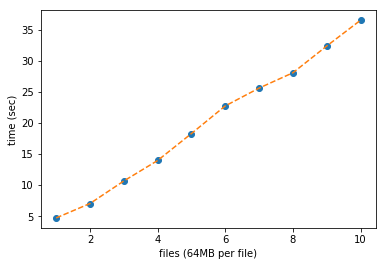

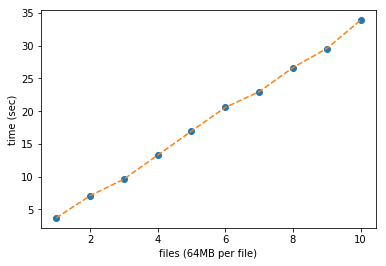

In [18]:
plotMeanLine(dfSmallFileNfs)
plotTop25Line(dfSmallFileNfs)

每組檔案打包成tar直接上傳 NFS-Provider

In [19]:
dfBigFileNfs = pd.read_csv('resultBigFileNfs.csv')
dfBigFileNfs

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
0,3.977292,7.406439,12.177583,11.539773,19.923647,21.697556,31.703340,38.435287,27.375658,30.964821
1,3.933133,6.276208,10.124248,12.165947,16.328022,19.853990,21.129256,27.710719,26.535848,28.845206
2,3.602364,10.323403,8.367644,12.138909,13.597438,17.725980,19.947713,24.916065,29.292055,30.514479
3,3.601476,6.715874,9.359606,14.106864,15.757503,17.805081,20.916530,22.441723,26.223157,28.730615
4,3.815856,5.470007,9.667533,11.507249,14.820586,18.379940,21.475914,25.174331,25.057638,29.885491
5,3.185929,6.159995,8.844509,19.727479,14.217861,17.779293,20.770188,23.079614,25.323511,28.944270
6,3.294770,6.151085,13.229636,11.440997,15.752202,23.395339,20.851561,22.037206,26.349614,28.591552
7,3.331180,5.737706,8.269977,12.510215,15.588515,19.006343,23.648745,25.159439,27.341223,30.908826
8,3.841921,6.610850,9.184798,12.025760,15.088694,18.144303,22.070214,29.883122,27.100213,49.421636
9,3.749361,6.332009,9.000359,12.725907,14.160501,19.186137,31.792042,39.233062,34.688120,26.794211


In [20]:
dfBigFileNfs.describe()

,1-file,2-file,3-file,4-file,5-file,6-file,7-file,8-file,9-file,10-file
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3.633328,6.718358,9.822589,12.988910,15.523497,19.297396,23.430550,27.807057,27.528704,31.360111
std,0.280186,1.373550,1.634704,2.493887,1.766200,1.889536,4.491318,6.276569,2.782052,6.472642
min,3.185929,5.470007,8.269977,11.440997,13.597438,17.725980,19.947713,22.037206,25.057638,26.794211
25%,3.398754,6.153313,8.883472,11.661269,14.368542,17.889886,20.867803,23.538727,26.254771,28.759263
50%,3.675863,6.304109,9.272202,12.152428,15.338605,18.693141,21.302585,25.166885,26.818030,29.414880
75%,3.835405,6.689618,10.010069,12.671984,15.756178,19.687027,23.254112,29.340021,27.367049,30.810239
max,3.977292,10.323403,13.229636,19.727479,19.923647,23.395339,31.792042,39.233062,34.688120,49.421636


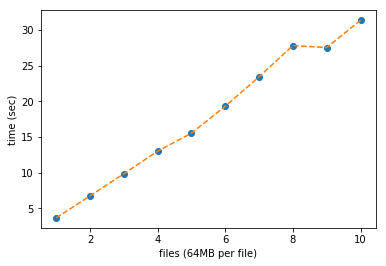

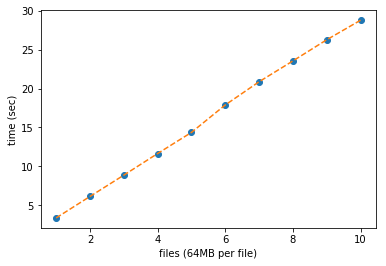

In [21]:
plotMeanLine(dfBigFileNfs)
plotTop25Line(dfBigFileNfs)

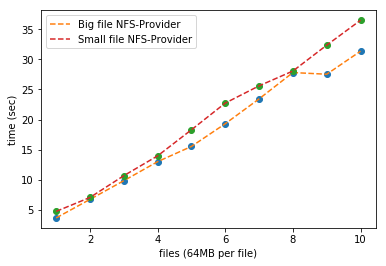

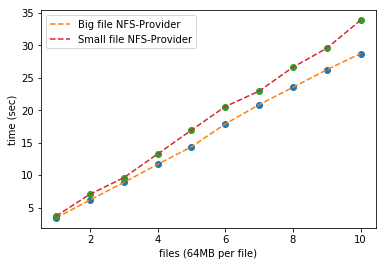

In [22]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileNfs.describe().iloc[1]), 'o')
plt.plot(testList, dfBigFileNfs.describe().iloc[1], '--', label='Big file NFS-Provider')
plt.plot(testList, list(dfSmallFileNfs.describe().iloc[1]), 'o')
plt.plot(testList, dfSmallFileNfs.describe().iloc[1], '--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFileNfs.describe().iloc[4]), 'o')
plt.plot(testList, dfBigFileNfs.describe().iloc[4], '--', label='Big file NFS-Provider')
plt.plot(testList, list(dfSmallFileNfs.describe().iloc[4]), 'o')
plt.plot(testList, dfSmallFileNfs.describe().iloc[4], '--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

比較 無儲存後端、Longhorn、NFS-Provider 每個64MB檔案 逐一上傳速度

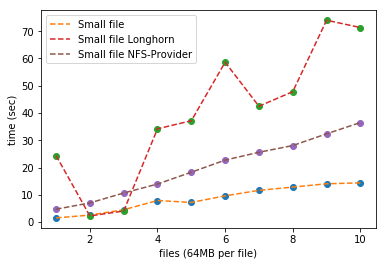

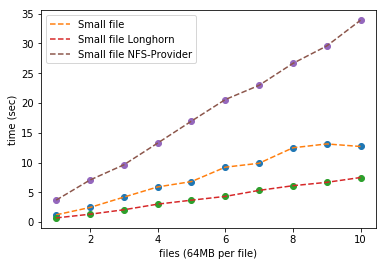

In [23]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFile.describe().iloc[1]), 'o')
plt.plot(testList, dfSmallFile.describe().iloc[1], '--', label='Small file')
plt.plot(testList, list(dfSmallFileLonghorn.describe().iloc[1]), 'o')
plt.plot(testList, dfSmallFileLonghorn.describe().iloc[1], '--', label='Small file Longhorn')
plt.plot(testList, list(dfSmallFileNfs.describe().iloc[1]), 'o')
plt.plot(testList, dfSmallFileNfs.describe().iloc[1], '--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfSmallFile.describe().iloc[4]), 'o')
plt.plot(testList, dfSmallFile.describe().iloc[4], '--', label='Small file')
plt.plot(testList, list(dfSmallFileLonghorn.describe().iloc[4]), 'o')
plt.plot(testList, dfSmallFileLonghorn.describe().iloc[4], '--', label='Small file Longhorn')
plt.plot(testList, list(dfSmallFileNfs.describe().iloc[4]), 'o')
plt.plot(testList, dfSmallFileNfs.describe().iloc[4], '--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

比較 無儲存後端、Longhorn、NFS-Provider 每組檔案打包成tar直接上傳

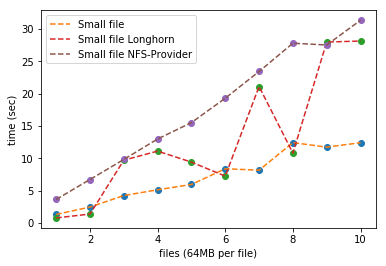

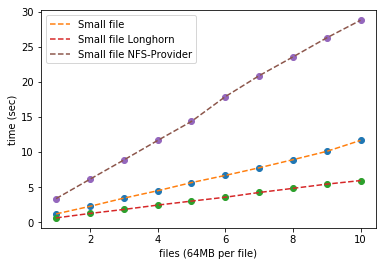

In [24]:
fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFile.describe().iloc[1]), 'o')
plt.plot(testList, dfBigFile.describe().iloc[1], '--', label='Small file')
plt.plot(testList, list(dfBigFileLonghorn.describe().iloc[1]), 'o')
plt.plot(testList, dfBigFileLonghorn.describe().iloc[1], '--', label='Small file Longhorn')
plt.plot(testList, list(dfBigFileNfs.describe().iloc[1]), 'o')
plt.plot(testList, dfBigFileNfs.describe().iloc[1], '--', label='Small file NFS-Provider')
plt.legend(loc='upper left')

fig = plt.figure()
plt.xlabel('files (64MB per file)')
plt.ylabel('time (sec)')
plt.plot(testList, list(dfBigFile.describe().iloc[4]), 'o')
plt.plot(testList, dfBigFile.describe().iloc[4], '--', label='Small file')
plt.plot(testList, list(dfBigFileLonghorn.describe().iloc[4]), 'o')
plt.plot(testList, dfBigFileLonghorn.describe().iloc[4], '--', label='Small file Longhorn')
plt.plot(testList, list(dfBigFileNfs.describe().iloc[4]), 'o')
plt.plot(testList, dfBigFileNfs.describe().iloc[4], '--', label='Small file NFS-Provider')
plt.legend(loc='upper left')